In [37]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import fdrcorrection, multipletests
import statsmodels

### 1. Load and visualize the data

a) 

In [2]:
core_path = './data'
transcriptomics = pd.read_csv( os.path.join(core_path, 'transcriptomics.dataset.txt'),sep= "\t")

In [3]:
transcriptomics.rename(columns = {"Unnamed: 0":'Gene_ID'})

,Gene_ID,Sample_1_preadi,Sample_2_preadi,Sample_3_preadi,Sample_4_preadi,Sample_5_preadi,Sample_6_preadi,Sample_7_preadi,Sample_8_preadi,Sample_9_preadi,...,Sample_71_adipo,Sample_72_adipo,Sample_73_adipo,Sample_74_adipo,Sample_75_adipo,Sample_76_adipo,Sample_77_adipo,Sample_78_adipo,Sample_79_adipo,Sample_80_adipo
0,ENSG00000000003,18,12,9,20,9,13,20,8,4,...,9,9,30,9,23,16,3,14,11,16
1,ENSG00000000005,0,0,0,2,0,0,0,0,0,...,0,1,29,2,22,3,0,2,0,5
2,ENSG00000000419,10,9,9,8,10,10,6,35,13,...,3,9,9,15,8,9,9,4,16,5
3,ENSG00000000457,0,11,0,6,2,12,11,1,2,...,9,8,8,5,6,0,12,13,4,11
4,ENSG00000000460,0,0,14,4,5,0,0,6,4,...,0,0,3,0,1,0,1,4,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63672,ENSG00000273489,0,0,0,2,0,1,8,0,0,...,0,0,0,0,0,0,0,0,0,0
63673,ENSG00000273490,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63674,ENSG00000273491,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63675,ENSG00000273492,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


What is the size of the matrix ?

63677 genes and 80 samples : matrix size 63677*80

b) What type of data do you have? Normalized or raw read counts (integer)?

number of transcripts, raw read counts

c)

In [4]:
print(list(transcriptomics.columns.values))

['Unnamed: 0', 'Sample_1_preadi', 'Sample_2_preadi', 'Sample_3_preadi', 'Sample_4_preadi', 'Sample_5_preadi', 'Sample_6_preadi', 'Sample_7_preadi', 'Sample_8_preadi', 'Sample_9_preadi', 'Sample_10_preadi', 'Sample_11_preadi', 'Sample_12_preadi', 'Sample_13_preadi', 'Sample_14_preadi', 'Sample_15_preadi', 'Sample_16_preadi', 'Sample_17_preadi', 'Sample_18_preadi', 'Sample_19_preadi', 'Sample_20_preadi', 'Sample_21_preadi', 'Sample_22_preadi', 'Sample_23_preadi', 'Sample_24_preadi', 'Sample_25_preadi', 'Sample_26_preadi', 'Sample_27_preadi', 'Sample_28_preadi', 'Sample_29_preadi', 'Sample_30_preadi', 'Sample_31_preadi', 'Sample_32_preadi', 'Sample_33_preadi', 'Sample_34_preadi', 'Sample_35_preadi', 'Sample_36_preadi', 'Sample_37_preadi', 'Sample_38_preadi', 'Sample_39_preadi', 'Sample_40_preadi', 'Sample_41_adipo', 'Sample_42_adipo', 'Sample_43_adipo', 'Sample_44_adipo', 'Sample_45_adipo', 'Sample_46_adipo', 'Sample_47_adipo', 'Sample_48_adipo', 'Sample_49_adipo', 'Sample_50_adipo', 'Sam

In [5]:
dict_sample = {}
for idx, sample in enumerate(transcriptomics.columns.values[1:]) :
    if ( sample == "Sample_{}_preadi".format(idx+1) ):
        #dict_sample["Sample_{}".format(idx+1)]="PreAdipo"
        dict_sample[sample]="PreAdipo"
    else :
        dict_sample[sample]="Adipo"
        

In [6]:
transcriptomics

,Unnamed: 0,Sample_1_preadi,Sample_2_preadi,Sample_3_preadi,Sample_4_preadi,Sample_5_preadi,Sample_6_preadi,Sample_7_preadi,Sample_8_preadi,Sample_9_preadi,...,Sample_71_adipo,Sample_72_adipo,Sample_73_adipo,Sample_74_adipo,Sample_75_adipo,Sample_76_adipo,Sample_77_adipo,Sample_78_adipo,Sample_79_adipo,Sample_80_adipo
0,ENSG00000000003,18,12,9,20,9,13,20,8,4,...,9,9,30,9,23,16,3,14,11,16
1,ENSG00000000005,0,0,0,2,0,0,0,0,0,...,0,1,29,2,22,3,0,2,0,5
2,ENSG00000000419,10,9,9,8,10,10,6,35,13,...,3,9,9,15,8,9,9,4,16,5
3,ENSG00000000457,0,11,0,6,2,12,11,1,2,...,9,8,8,5,6,0,12,13,4,11
4,ENSG00000000460,0,0,14,4,5,0,0,6,4,...,0,0,3,0,1,0,1,4,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63672,ENSG00000273489,0,0,0,2,0,1,8,0,0,...,0,0,0,0,0,0,0,0,0,0
63673,ENSG00000273490,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63674,ENSG00000273491,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63675,ENSG00000273492,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


d)

In [7]:
transcriptomics.iloc[:,1:]

,Sample_1_preadi,Sample_2_preadi,Sample_3_preadi,Sample_4_preadi,Sample_5_preadi,Sample_6_preadi,Sample_7_preadi,Sample_8_preadi,Sample_9_preadi,Sample_10_preadi,...,Sample_71_adipo,Sample_72_adipo,Sample_73_adipo,Sample_74_adipo,Sample_75_adipo,Sample_76_adipo,Sample_77_adipo,Sample_78_adipo,Sample_79_adipo,Sample_80_adipo
0,18,12,9,20,9,13,20,8,4,7,...,9,9,30,9,23,16,3,14,11,16
1,0,0,0,2,0,0,0,0,0,0,...,0,1,29,2,22,3,0,2,0,5
2,10,9,9,8,10,10,6,35,13,15,...,3,9,9,15,8,9,9,4,16,5
3,0,11,0,6,2,12,11,1,2,0,...,9,8,8,5,6,0,12,13,4,11
4,0,0,14,4,5,0,0,6,4,0,...,0,0,3,0,1,0,1,4,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63672,0,0,0,2,0,1,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63673,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63674,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63675,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
(transcriptomics.iloc[:,1:] != 0).any(axis=1)

0         True
1         True
2         True
3         True
4         True
         ...  
63672     True
63673    False
63674    False
63675    False
63676     True
Length: 63677, dtype: bool

In [9]:
transcriptomics = transcriptomics.loc[(transcriptomics.iloc[:,1:] != 0).any(axis=1),:]

In [10]:
transcriptomics

,Unnamed: 0,Sample_1_preadi,Sample_2_preadi,Sample_3_preadi,Sample_4_preadi,Sample_5_preadi,Sample_6_preadi,Sample_7_preadi,Sample_8_preadi,Sample_9_preadi,...,Sample_71_adipo,Sample_72_adipo,Sample_73_adipo,Sample_74_adipo,Sample_75_adipo,Sample_76_adipo,Sample_77_adipo,Sample_78_adipo,Sample_79_adipo,Sample_80_adipo
0,ENSG00000000003,18,12,9,20,9,13,20,8,4,...,9,9,30,9,23,16,3,14,11,16
1,ENSG00000000005,0,0,0,2,0,0,0,0,0,...,0,1,29,2,22,3,0,2,0,5
2,ENSG00000000419,10,9,9,8,10,10,6,35,13,...,3,9,9,15,8,9,9,4,16,5
3,ENSG00000000457,0,11,0,6,2,12,11,1,2,...,9,8,8,5,6,0,12,13,4,11
4,ENSG00000000460,0,0,14,4,5,0,0,6,4,...,0,0,3,0,1,0,1,4,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63668,ENSG00000273485,0,0,0,1,0,5,0,0,0,...,0,0,0,0,0,12,0,0,0,0
63669,ENSG00000273486,0,0,0,0,1,0,0,0,0,...,0,2,0,3,0,2,5,1,0,0
63670,ENSG00000273487,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63672,ENSG00000273489,0,0,0,2,0,1,8,0,0,...,0,0,0,0,0,0,0,0,0,0


e)

In [11]:
transcriptomics.iloc[:,1:].sum()

Sample_1_preadi    1000000
Sample_2_preadi    1000000
Sample_3_preadi    1000000
Sample_4_preadi    1000000
Sample_5_preadi    1000000
                    ...   
Sample_76_adipo    1000000
Sample_77_adipo    1000000
Sample_78_adipo    1000000
Sample_79_adipo    1000000
Sample_80_adipo    1000000
Length: 80, dtype: int64

In [12]:
depth = pd.DataFrame({'Samples':list(range(1,81)), 'depth':transcriptomics.iloc[:,1:].sum()})

In [13]:
(transcriptomics.iloc[:,1:].sum() == 1000000).all()

True

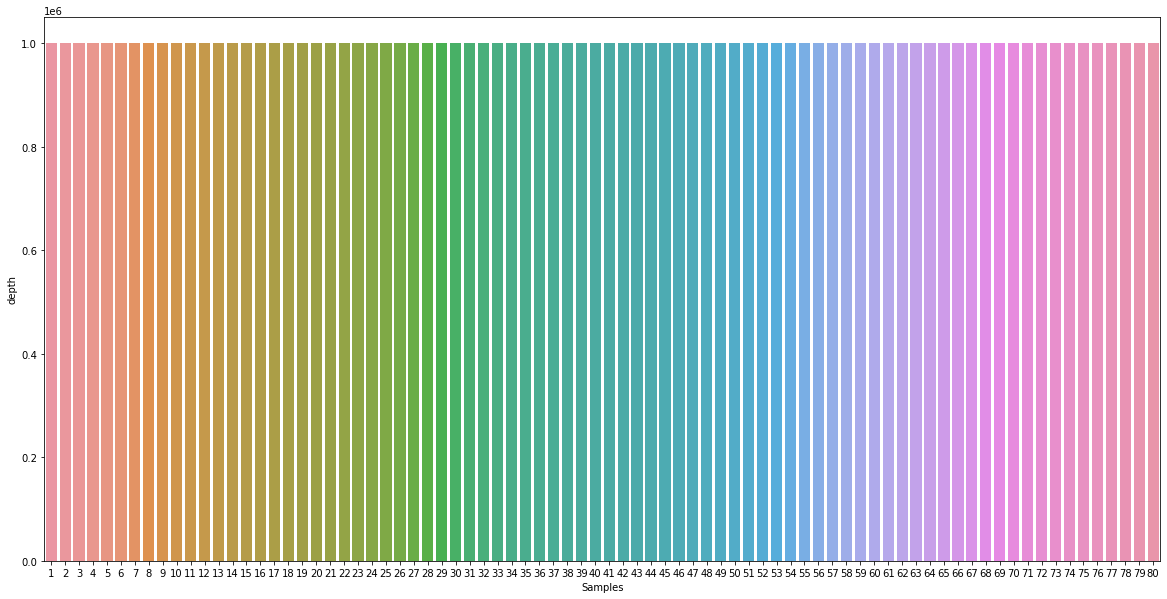

In [14]:
plt.figure(figsize=(20,10))
ax =sns.barplot( data=depth, y='depth', x="Samples")

Do not need to normalized

f)

In [15]:
dict_sample.values()

dict_values(['PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'PreAdipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo', 'Adipo'])

In [16]:
X = transcriptomics.iloc[:,1:].T.to_numpy(dtype=float)
pca = PCA(n_components=3)
pca_output = pca.fit_transform(X)
pca_output_df = pd.DataFrame(pca_output, columns=['PCA1', 'PCA2', 'PCA3'])
pca_output_df["groups"] =dict_sample.values()
pca_output_df

,PCA1,PCA2,PCA3,groups
0,59744.204875,5181.484207,34953.673194,PreAdipo
1,-36447.502550,11214.469551,6564.207381,PreAdipo
2,-15666.397486,-7873.272341,3183.165238,PreAdipo
3,-22423.413307,-20027.140990,-15412.563780,PreAdipo
4,-15830.729625,-13797.002922,-8727.933106,PreAdipo
...,...,...,...,...
75,39830.374618,16913.116447,2542.199214,Adipo
76,44353.454788,-2109.828106,-14291.751796,Adipo
77,-2515.045934,2289.387447,-29504.065115,Adipo
78,-23979.413582,32201.099006,-2077.782790,Adipo


In [17]:
fig = px.scatter_3d(pca_output_df, x='PCA1', y='PCA2', z='PCA3', color="groups")
fig.show()

g)

In [18]:
transcriptomics_transf =pd.DataFrame(np.log2(1+transcriptomics.iloc[:,1:]))

In [19]:
transcriptomics_transf.insert(0, 'Gene_ID', transcriptomics.iloc[:,0])

In [20]:
transcriptomics_transf

,Gene_ID,Sample_1_preadi,Sample_2_preadi,Sample_3_preadi,Sample_4_preadi,Sample_5_preadi,Sample_6_preadi,Sample_7_preadi,Sample_8_preadi,Sample_9_preadi,...,Sample_71_adipo,Sample_72_adipo,Sample_73_adipo,Sample_74_adipo,Sample_75_adipo,Sample_76_adipo,Sample_77_adipo,Sample_78_adipo,Sample_79_adipo,Sample_80_adipo
0,ENSG00000000003,4.247928,3.700440,3.321928,4.392317,3.321928,3.807355,4.392317,3.169925,2.321928,...,3.321928,3.321928,4.954196,3.321928,4.584963,4.087463,2.000000,3.906891,3.584963,4.087463
1,ENSG00000000005,0.000000,0.000000,0.000000,1.584963,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,4.906891,1.584963,4.523562,2.000000,0.000000,1.584963,0.000000,2.584963
2,ENSG00000000419,3.459432,3.321928,3.321928,3.169925,3.459432,3.459432,2.807355,5.169925,3.807355,...,2.000000,3.321928,3.321928,4.000000,3.169925,3.321928,3.321928,2.321928,4.087463,2.584963
3,ENSG00000000457,0.000000,3.584963,0.000000,2.807355,1.584963,3.700440,3.584963,1.000000,1.584963,...,3.321928,3.169925,3.169925,2.584963,2.807355,0.000000,3.700440,3.807355,2.321928,3.584963
4,ENSG00000000460,0.000000,0.000000,3.906891,2.321928,2.584963,0.000000,0.000000,2.807355,2.321928,...,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,1.000000,2.321928,0.000000,3.459432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63668,ENSG00000273485,0.000000,0.000000,0.000000,1.000000,0.000000,2.584963,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.700440,0.000000,0.000000,0.000000,0.000000
63669,ENSG00000273486,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.584963,0.000000,2.000000,0.000000,1.584963,2.584963,1.000000,0.000000,0.000000
63670,ENSG00000273487,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
63672,ENSG00000273489,0.000000,0.000000,0.000000,1.584963,0.000000,1.000000,3.169925,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


h)

In [21]:
X = transcriptomics_transf.iloc[:,1:].T.to_numpy(dtype=float)
pca = PCA(n_components=3)
pca_output_log = pca.fit_transform(X)
pca_output_log_df = pd.DataFrame(pca_output_log, columns=['PCA1', 'PCA2', 'PCA3'])
pca_output_log_df["groups"] =dict_sample.values()
pca_output_log_df

,PCA1,PCA2,PCA3,groups
0,-42.826328,58.870284,7.314757,PreAdipo
1,-46.518798,-5.596105,-14.516543,PreAdipo
2,-63.707133,-33.929053,36.991702,PreAdipo
3,-57.726232,-67.490791,-11.251012,PreAdipo
4,-49.397369,-52.324108,9.422596,PreAdipo
...,...,...,...,...
75,53.782770,-3.432584,-58.763464,Adipo
76,69.008352,1.024703,43.887713,Adipo
77,61.583717,-54.186649,4.284744,Adipo
78,30.881711,-23.491767,-43.376132,Adipo


In [22]:
fig = px.scatter_3d(pca_output_log_df, x='PCA1', y='PCA2', z='PCA3', color="groups")
fig.show()

TRansformed data has better cluster

### 2. Differential gene expression

In [23]:
de_results = pd.DataFrame(columns = ["pval"," fdr"," log2_mean_preadipo","log2_mean_adipo","log2_fold_change"])

a)

In [24]:
pvalue=[]
for index, gene in transcriptomics_transf.iterrows():
    #Adipo_samples = {i for i in dict_sample if dict_sample[i]=="Adipo"}
    # PreAdipo_samples = {i for i in dict_sample if dict_sample[i]=="PreAdipo"}
    # ttest_ind(gene[Adipo_samples], gene[PreAdipo_samples])
    _,pval =(ttest_ind(gene[1:41], gene[42:81]))
    pvalue.append(pval)

In [25]:
pvalue

[0.030795684409018677,
 7.174029797192268e-10,
 0.4160088959994662,
 0.4232047312729389,
 0.39404505172286963,
 3.272651552324564e-12,
 4.5215038386974086e-08,
 4.390624655504188e-08,
 0.0017568072735533481,
 0.0443374733391082,
 0.5298546934400564,
 0.6116823092850274,
 0.4886298187256958,
 0.22449676732612478,
 0.37089015583341545,
 0.17225572638863917,
 0.26048038676665614,
 0.009501760296873097,
 0.15544078546388662,
 0.09815101949940123,
 0.3142764240989545,
 0.3720288044833827,
 0.381351484332203,
 0.020597264307292328,
 0.7384009772528072,
 0.616172240214473,
 0.15149687841946274,
 0.4049653546742876,
 0.009417424386647161,
 1.4085037689773552e-12,
 0.7573915480067872,
 0.6848444053086156,
 0.3496303493854831,
 1.1008805815558478e-15,
 0.5718795245221766,
 0.5358926672468953,
 0.6228801916962026,
 2.710595446214632e-09,
 7.436102429753345e-07,
 0.4546436820784866,
 0.5786312925133861,
 0.9795997218601918,
 0.4666355432465532,
 0.2339860274159174,
 1.489469586218747e-05,
 0.55472

next step Welch test guys (enfin chais pas jai pas verif la variance)

In [26]:
pvalue=[]
for index, gene in transcriptomics_transf.iterrows():
    #Adipo_samples = {i for i in dict_sample if dict_sample[i]=="Adipo"}
    # PreAdipo_samples = {i for i in dict_sample if dict_sample[i]=="PreAdipo"}
    # ttest_ind(gene[Adipo_samples], gene[PreAdipo_samples])
    _,pval =(ttest_ind(gene[1:41], gene[42:81], equal_var=False))
    pvalue.append(pval)

In [27]:
de_results["pval"] = pvalue

In [28]:
pvalue

[0.03060398905018106,
 1.8594169864952252e-08,
 0.4171526346637645,
 0.42252205957166655,
 0.3935985300863313,
 3.2737983883312857e-11,
 4.936092064327865e-08,
 4.5207149521778086e-08,
 0.001820013851034532,
 0.043980872134349994,
 0.5301750546744024,
 0.6127547539701276,
 0.4877740776148153,
 0.22800851343384884,
 0.3709678145919122,
 0.1707365548396199,
 0.260117859523025,
 0.010532823885715945,
 0.15675961423455353,
 0.09814831829841758,
 0.32363608386440845,
 0.37123243599307254,
 0.38200232848806115,
 0.020655872684320276,
 0.7378334936962851,
 0.6162732862443486,
 0.15119517536661572,
 0.4050757783368719,
 0.009454186413161845,
 1.0756565286109501e-10,
 0.7577432641539201,
 0.6839908954916099,
 0.35029948169734215,
 8.34563996507929e-13,
 0.5715024217952633,
 0.5353978281343508,
 0.6228476227189725,
 3.0739541773353602e-09,
 9.995667603400454e-07,
 0.45461739565478254,
 0.5789041749294084,
 0.9796030369484363,
 0.46960796323371623,
 0.23499586538163902,
 2.072541055723687e-05,
 0

In [29]:
np.array(pvalue)

array([3.06039891e-02, 1.85941699e-08, 4.17152635e-01, ...,
       7.44152239e-01, 7.80346373e-03, 4.12147017e-01])

In [30]:
de_results.pval

0        3.060399e-02
1        1.859417e-08
2        4.171526e-01
3        4.225221e-01
4        3.935985e-01
             ...     
30233    8.355549e-01
30234    9.088432e-02
30235    7.441522e-01
30236    7.803464e-03
30237    4.121470e-01
Name: pval, Length: 30238, dtype: float64

In [40]:
_, fdr_corrected_p_values = fdrcorrection(de_results.pval)

In [41]:
fdr_corrected_p_values

array([nan, nan, nan, ..., nan, nan, nan])

In [33]:
_, multitest_corrected_p_values, _, _ = multipletests(np.array(pvalue), method="fdr_bh")

In [34]:
multitest_corrected_p_values

array([nan, nan, nan, ..., nan, nan, nan])

In [35]:
de_results

,pval,fdr,log2_mean_preadipo,log2_mean_adipo,log2_fold_change
0,3.060399e-02,NaN,NaN,NaN,NaN
1,1.859417e-08,NaN,NaN,NaN,NaN
2,4.171526e-01,NaN,NaN,NaN,NaN
3,4.225221e-01,NaN,NaN,NaN,NaN
4,3.935985e-01,NaN,NaN,NaN,NaN
...,...,...,...,...,...
30233,8.355549e-01,NaN,NaN,NaN,NaN
30234,9.088432e-02,NaN,NaN,NaN,NaN
30235,7.441522e-01,NaN,NaN,NaN,NaN
30236,7.803464e-03,NaN,NaN,NaN,NaN
